# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Analyze trends in SAT & ACT data from 2017 - 2018 and make recommendations to increase SAT participation and scores.

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

sat_2017:  
51 rows, 5 columns  
Columns & data types: State (object), Participation (object), Evidence-Based Reading and Writing (int64), Math (int64), Total (int64)  

act_2017:  
52 rows, 7 columns  
Columns & data types: State (object), Participation (object), English (float64), Math (float64), Reading (float64), Science (float64), Composite (object)  



#### 4a. Does the data look complete? 

In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


Answer:

SAT data has 51 records (one per state + DC). No null values in any columns.

ACT data has 52 records (one per state + DC + national summary). No null values in any columns.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
sat_2017.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,51,51,51.000000,51.000000,51.000000
unique,51,34,NaN,NaN,NaN
top,South Carolina,3%,NaN,NaN,NaN
freq,1,8,NaN,NaN,NaN
mean,NaN,NaN,569.117647,547.627451,1126.098039
std,NaN,NaN,45.666901,84.909119,92.494812
min,NaN,NaN,482.000000,52.000000,950.000000
25%,NaN,NaN,533.500000,522.000000,1055.500000
50%,NaN,NaN,559.000000,548.000000,1107.000000
75%,NaN,NaN,613.000000,599.000000,1212.000000


In [8]:
# show states w/Math score below minimum possible value for SAT 2017

sat_2017[sat_2017['Math'] < 200]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
act_2017.describe(include='all')

,State,Participation,English,Math,Reading,Science,Composite
count,52,52,52.000000,52.000000,52.000000,52.000000,52
unique,52,28,NaN,NaN,NaN,NaN,38
top,South Carolina,100%,NaN,NaN,NaN,NaN,20.3
freq,1,17,NaN,NaN,NaN,NaN,3
mean,NaN,NaN,20.919231,21.173077,22.001923,21.040385,NaN
std,NaN,NaN,2.332132,1.963602,2.048672,3.151113,NaN
min,NaN,NaN,16.300000,18.000000,18.100000,2.300000,NaN
25%,NaN,NaN,19.000000,19.400000,20.475000,19.900000,NaN
50%,NaN,NaN,20.550000,20.900000,21.700000,21.150000,NaN
75%,NaN,NaN,23.300000,23.100000,24.125000,22.525000,NaN


In [10]:
# show 'Participation', 'Composite', 'Science' columns for all states for ACT 2017
act_2017[['State', 'Participation', 'Composite', 'Science']]

,State,Participation,Composite,Science
0,National,60%,21.0,21.0
1,Alabama,100%,19.2,19.4
2,Alaska,65%,19.8,19.9
3,Arizona,62%,19.7,19.8
4,Arkansas,100%,19.4,19.5
5,California,31%,22.8,22.2
6,Colorado,100%,20.8,20.9
7,Connecticut,31%,25.2,24.6
8,Delaware,18%,24.1,23.6
9,District of Columbia,32%,24.2,23.5


In [11]:
# show states w/outlier low scores for ACT 2017

act_2017[act_2017['Science'] < 18.0]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer:

SAT: Each section is scored between 200 – 800.
Issues: min Math score is 52.0

ACT: Each ACT section, and the overall composite score, are scored between 1 and 36. 
The min and max values for English, Math, Reading, and Science are all within the possible range, however the min Science score of 2.3 is an outlier. Composite values are strings rather than floats. Checking the data shows this is because of a typo in row 51 ('20.2x' instead of 20.2).

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
# Correct values for the errors identified above were found here: 
# SAT: https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
# ACT: https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

# SAT: fix typo in Maryland Math score
sat_2017.loc[20, 'Math'] = 524

# ACT: fix typo in Wyoming Composite score
act_2017.loc[51, 'Composite'] = act_2017.loc[51, 'Composite'].strip('x')

# ACT: fix typo in Maryland Science score
act_2017.loc[21, 'Science'] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

SAT datatypes: 
Columns containing string values: 'State', 'Participation'. 'Participation' values are set to strings by pandas when importing the data from .csv because they contain a '%'. This column should be converted to numerical data for further analysis.
Columns containing integer values: 'Evidence-Based Reading and Writing', 'Math', 'Total'.

ACT datatypes:
Columns containing string values: 'State', 'Participation', 'Composite'. 'Participation' values contain '%' and 'Composite' had a typo (fixed in step 4c above). They should be converted to numerical data for further analysis.
Columns containing float values: 'English', 'Math', 'Reading', 'Science'.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [16]:
# Define a function that will allow you to convert participation rates to an appropriate numeric type

def pfloat(pstring):
    return float(pstring.strip('%')) / 100

In [17]:
# convert sat_2017['Participation'] values to float

sat_2017['Participation'] = sat_2017['Participation'].map(pfloat)

In [18]:
# confirm columns are now typed appropriately

sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [19]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [20]:
# convert act_2017['Participation'] values to float

act_2017['Participation'] = act_2017['Participation'].map(pfloat)

In [21]:
# confirm columns are now typed appropriately

act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

act_2017['Composite'] had a typo (fixed in step 4c above).

In [22]:
# convert act_2017['Composite'] values to float

act_2017['Composite'] = act_2017['Composite'].map(float)

In [23]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [24]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [25]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
sat_2017.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [27]:
# rename sat_2017 columns
sat_2017.columns = ['state', 'sat_2017_participation', 
                    'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total']

In [28]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [29]:
# rename act_2017 columns
act_2017.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 'act_2017_reading', 
                    'act_2017_science', 'act_2017_composite']

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|name of state| 
|act_2017_participation|float|ACT 2017|percent participation in decimal| 
|act_2017_english|float|ACT 2017|average ACT English test score| 
|act_2017_math|float|ACT 2017|average ACT Math test score| 
|act_2017_reading|float|ACT 2017|average ACT Reading test score| 
|act_2017_science|float|ACT 2017|average ACT Science test score| 
|act_2017_composite|float|ACT 2017|average ACT composite score| 
|sat_2017_participation|float|SAT 2017|percent participation in decimal| 
|sat_2017_reading_and_writing|int|SAT 2017|average SAT Reading and Writing test score|
|sat_2017_math|int|SAT 2017|average SAT Math test score|
|sat_2017_total|int|SAT 2017|average SAT total score|
|act_2018_participation|float|ACT 2018|percent participation in decimal| 
|act_2018_composite|float|ACT 2018|average ACT composite score| 
|sat_2018_participation|float|SAT 2018|percent participation in decimal| 
|sat_2018_reading_and_writing|int|SAT 2018|average SAT Reading and Writing test score| 
|sat_2018_math|int|SAT 2018|average SAT Math test score| 
|sat_2018_total|int|SAT 2018|average SAT total score|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
# ACT data has an extra row (national summary).
# Remove extra row from dataframe

act_2017.drop(0, inplace=True)
act_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite
1,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
2,Alaska,0.65,18.7,19.8,20.4,19.9,19.8
3,Arizona,0.62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4
5,California,0.31,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
# pandas merge function pd.merge joins the two dataframes on the column given

combined_2017 = pd.merge(act_2017, sat_2017, on=act_2017['state'])
combined_2017.head()

,key_0,state_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,state_y,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,Alabama,0.05,593,572,1165
1,Alaska,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,Alaska,0.38,547,533,1080
2,Arizona,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,Arizona,0.30,563,553,1116
3,Arkansas,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,Arkansas,0.03,614,594,1208
4,California,California,0.31,22.5,22.7,23.1,22.2,22.8,California,0.53,531,524,1055


In [32]:
combined_2017.columns

Index(['key_0', 'state_x', 'act_2017_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite', 'state_y', 'sat_2017_participation',
       'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total'],
      dtype='object')

In [33]:
# drop the duplicated columns 'state_x', 'state_y' and rename 'key_0' to 'state'

combined_2017.drop(columns=['state_x', 'state_y'], inplace=True)
combined_2017.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 'act_2017_reading', 
                         'act_2017_science', 'act_2017_composite', 'sat_2017_participation', 
                         'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total']
combined_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [34]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [35]:
sat_2018 = pd.read_csv('../data/East_Coast_Data_Entry - SAT 2018.csv')
act_2018 = pd.read_csv('../data/East_Coast_Data_Entry - ACT 2018.csv')

In [36]:
# check if dataframe looks like it read in correctly
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1168
4,California,60%,540,536,1076


In [37]:
# check if dataframe looks like it read in correctly
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
47,Washington,69%,543,538,1081
48,West Virginia,28%,513,486,999
49,Wisconsin,3%,641,653,1294
50,Wyoming,3,633,625,1258
51,National,51%,568,558,1126


In [38]:
# check if dataframe looks like it read in correctly
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [39]:
# check if dataframe looks like it read in correctly
act_2018.tail()

,State,Participation,Composite
47,Washington,24%,22.2
48,West Virginia,65%,20.3
49,Wisconsin,100%,20.5
50,Wyoming,100%,20.0
51,National,50%,21.5


In [40]:
# check if data is complete and columns are correct data types
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
State                                 52 non-null object
Participation                         52 non-null object
Evidence-Based Reading and Writing    52 non-null int64
Math                                  52 non-null int64
Total                                 52 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [41]:
# check if data is complete and columns are correct data types
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


SAT data has 52 records (one per state + DC + national summary). No null values in any columns.

ACT data has 52 records (one per state + DC + national summary). No null values in any columns. 
ACT 2018 data for scores has only Composite score, while ACT 2017 data had additional columns with the scores for the different sections broken out.

Participation column for both dataframes needs to be converted to float, similar to the 2017 data.

In [42]:
# check if summary information on scores, ie. min & max, seems reasonable

sat_2018.describe(include='all')

,State,Participation,Evidence-Based Reading and Writing,Math,Total
count,52,52,52.000000,52.000000,52.000000
unique,52,35,NaN,NaN,NaN
top,South Carolina,4%,NaN,NaN,NaN
freq,1,7,NaN,NaN,NaN
mean,NaN,NaN,567.711538,558.442308,1126.153846
std,NaN,NaN,44.864649,48.977551,93.513632
min,NaN,NaN,497.000000,480.000000,977.000000
25%,NaN,NaN,535.000000,521.750000,1063.500000
50%,NaN,NaN,558.000000,547.000000,1102.500000
75%,NaN,NaN,615.750000,598.000000,1215.000000


In [43]:
# check if summary information on scores, ie. min & max, seems reasonable

act_2018.describe(include='all')

,State,Participation,Composite
count,52,52,52.000000
unique,52,30,NaN
top,South Carolina,100%,NaN
freq,1,17,NaN
mean,NaN,NaN,21.496154
std,NaN,NaN,2.090779
min,NaN,NaN,17.700000
25%,NaN,NaN,19.975000
50%,NaN,NaN,21.300000
75%,NaN,NaN,23.625000


In [44]:
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [45]:
act_2018.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [46]:
# convert SAT & ACT 'Participation' values to float

sat_2018['Participation'] = sat_2018['Participation'].map(pfloat)
act_2018['Participation'] = act_2018['Participation'].map(pfloat)

In [47]:
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [48]:
act_2018.dtypes

State             object
Participation    float64
Composite        float64
dtype: object

In [49]:
# remove extra row (national summary) from sat_2018 and act_2018

sat_2018.drop(51, inplace=True)
sat_2018.tail()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
46,Virginia,0.68,567,550,1117
47,Washington,0.69,543,538,1081
48,West Virginia,0.28,513,486,999
49,Wisconsin,0.03,641,653,1294
50,Wyoming,0.03,633,625,1258


In [50]:
# remove extra row (national summary) from sat_2018 and act_2018

act_2018.drop(51, inplace=True)
act_2018.tail()

,State,Participation,Composite
46,Virginia,0.24,23.9
47,Washington,0.24,22.2
48,West Virginia,0.65,20.3
49,Wisconsin,1.00,20.5
50,Wyoming,1.00,20.0


In [51]:
# pd.merge joins the two dataframes on the column given

combined_2018 = pd.merge(act_2018, sat_2018, on=act_2018['State'])
combined_2018.head()

,key_0,State_x,Participation_x,Composite,State_y,Participation_y,Evidence-Based Reading and Writing,Math,Total
0,Alabama,Alabama,1.00,19.1,Alabama,0.06,595,571,1166
1,Alaska,Alaska,0.33,20.8,Alaska,0.43,562,544,1106
2,Arizona,Arizona,0.66,19.2,Arizona,0.29,577,572,1149
3,Arkansas,Arkansas,1.00,19.4,Arkansas,0.05,592,576,1168
4,California,California,0.27,22.7,California,0.60,540,536,1076


In [52]:
combined_2018.columns

Index(['key_0', 'State_x', 'Participation_x', 'Composite', 'State_y',
       'Participation_y', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [53]:
# drop the duplicate columns 'State_x', 'State_y' and rename 'key_0' to 'state'

combined_2018.drop(columns=['State_x', 'State_y'], inplace=True)
combined_2018.columns = ['state', 'act_2018_participation', 'act_2018_composite', 'sat_2018_participation', 
                         'sat_2018_reading_and_writing', 'sat_2018_math', 'sat_2018_total']
combined_2018.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.27,22.7,0.60,540,536,1076


In [54]:
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [55]:
combined_2017.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [56]:
combined_2018.head()

,state,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,0.27,22.7,0.60,540,536,1076


In [57]:
# pd.merge joins the two dataframes on the column given

final = pd.merge(combined_2017, combined_2018, on=combined_2017['state'])
final.head()

,key_0,state_x,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,state_y,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,Alabama,1.00,19.1,0.06,595,571,1166
1,Alaska,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,Alaska,0.33,20.8,0.43,562,544,1106
2,Arizona,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,Arizona,0.66,19.2,0.29,577,572,1149
3,Arkansas,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,Arkansas,1.00,19.4,0.05,592,576,1168
4,California,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,California,0.27,22.7,0.60,540,536,1076


In [58]:
final.columns

Index(['key_0', 'state_x', 'act_2017_participation', 'act_2017_english',
       'act_2017_math', 'act_2017_reading', 'act_2017_science',
       'act_2017_composite', 'sat_2017_participation',
       'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total',
       'state_y', 'act_2018_participation', 'act_2018_composite',
       'sat_2018_participation', 'sat_2018_reading_and_writing',
       'sat_2018_math', 'sat_2018_total'],
      dtype='object')

In [59]:
# drop the duplicate columns 'state_x', 'state_y'

final.drop(columns=['state_x', 'state_y'], inplace=True)

In [60]:
final.columns

Index(['key_0', 'act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_reading_and_writing',
       'sat_2017_math', 'sat_2017_total', 'act_2018_participation',
       'act_2018_composite', 'sat_2018_participation',
       'sat_2018_reading_and_writing', 'sat_2018_math', 'sat_2018_total'],
      dtype='object')

In [61]:
# rename 'key_0' to 'state'

final.columns = ['state', 'act_2017_participation', 'act_2017_english', 'act_2017_math', 
                         'act_2017_reading', 'act_2017_science', 'act_2017_composite', 'sat_2017_participation', 
                         'sat_2017_reading_and_writing', 'sat_2017_math', 'sat_2017_total', 'act_2018_participation', 
                         'act_2018_composite', 'sat_2018_participation','sat_2018_reading_and_writing', 
                         'sat_2018_math', 'sat_2018_total']
final.head()

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165,1.00,19.1,0.06,595,571,1166
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080,0.33,20.8,0.43,562,544,1106
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116,0.66,19.2,0.29,577,572,1149
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208,1.00,19.4,0.05,592,576,1168
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055,0.27,22.7,0.60,540,536,1076


In [62]:
# save final combined dataframe to csv
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [63]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_reading_and_writing,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [64]:
# function to calculate standard deviation of a series or column of dataframe

def calc_std(col):
    std = 0 # initialize std
    mean = col.mean() # get mean of column
    for i in range(len(col)): # loop sums the values of (x_i - mean)^2
        std += (col[i] - mean) ** 2
    std = std / len(col) # dividing by n is same as multiplying by 1/n
    std = std ** 0.5 # x^0.5 is same as taking square root of x
    return std

In [65]:
calc_std(final.act_2017_participation)

0.3182417575123181

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [66]:
# create list of column names for all numeric columns

num_cols = ['act_2017_participation', 'act_2017_english', 'act_2017_math',
       'act_2017_reading', 'act_2017_science', 'act_2017_composite',
       'sat_2017_participation', 'sat_2017_reading_and_writing',
       'sat_2017_math', 'sat_2017_total', 'act_2018_participation',
       'act_2018_composite', 'sat_2018_participation',
       'sat_2018_reading_and_writing', 'sat_2018_math', 'sat_2018_total']

std_dict = {k:calc_std(final[k]) for k in num_cols}

In [67]:
std_dict

{'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2017_participation': 0.3492907076664507,
 'sat_2017_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2018_participation': 0.33701735820410317,
 'act_2018_composite': 2.090779082141178,
 'sat_2018_participation': 0.36933213828978173,
 'sat_2018_reading_and_writing': 44.864630427956726,
 'sat_2018_math': 48.97751133618255,
 'sat_2018_total': 93.51362961350053}

In [68]:
np.std(final)

act_2017_participation           0.318242
act_2017_english                 2.330488
act_2017_math                    1.962462
act_2017_reading                 2.046903
act_2017_science                 1.722216
act_2017_composite               2.000786
sat_2017_participation           0.349291
sat_2017_reading_and_writing    45.216970
sat_2017_math                   46.657134
sat_2017_total                  91.583511
act_2018_participation           0.337017
act_2018_composite               2.090779
sat_2018_participation           0.369332
sat_2018_reading_and_writing    44.864630
sat_2018_math                   48.977511
sat_2018_total                  93.513630
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:  
My manually calculated standard deviations are close to the output from pandas `describe` but are off by approx. 0.01.  They appear to be the same as numpy's `std` method (although `std` results are rounded to the nearest 0.000001). I'm guessing that the numpy results are more accurate because numpy is the package for scientific computing, although if pandas is built using numpy, I'm not sure why the results are not exactly the same.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [69]:
# highest 2017 SAT participation:

# first part returns a dataframe with just the 2 columns (for simplification of displayed results):
# final.loc[:, ['state', 'sat_2017_participation']] 
# 2nd part sorts the rows by the 'sat_2017_participation' value, highest to lowest:
# .sort_values(by='act_2017_participation', ascending=False)

final.loc[:, ['state', 'sat_2017_participation']].sort_values(by='sat_2017_participation', ascending=False).head()

,state,sat_2017_participation
8,District of Columbia,1.00
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
29,New Hampshire,0.96


In [70]:
# highest 2018 SAT participation

final.loc[:, ['state', 'sat_2018_participation']].sort_values(by='sat_2018_participation', ascending=False).head()

,state,sat_2018_participation
22,Michigan,1.00
6,Connecticut,1.00
7,Delaware,1.00
12,Idaho,1.00
19,Maine,0.99


In [71]:
# lowest 2017 SAT participation

final.loc[:, ['state', 'sat_2017_participation']].sort_values(by='sat_2017_participation').head()

,state,sat_2017_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02
25,Missouri,0.03
44,Utah,0.03


In [72]:
# lowest 2018 SAT participation

final.loc[:, ['state', 'sat_2018_participation']].sort_values(by='sat_2018_participation').head()

,state,sat_2018_participation
34,North Dakota,0.02
50,Wyoming,0.03
41,South Dakota,0.03
27,Nebraska,0.03
49,Wisconsin,0.03


In [73]:
# highest 2017 ACT participation

final.loc[:, ['state', 'act_2017_participation']].sort_values(by='act_2017_participation', ascending=False).head(20)

,state,act_2017_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
33,North Carolina,1.00
28,Nevada,1.00
26,Montana,1.00


In [74]:
# highest 2018 ACT participation

final.loc[:, ['state', 'act_2018_participation']].sort_values(by='act_2018_participation', ascending=False).head(20)

,state,act_2018_participation
0,Alabama,1.00
17,Kentucky,1.00
49,Wisconsin,1.00
44,Utah,1.00
42,Tennessee,1.00
40,South Carolina,1.00
36,Oklahoma,1.00
35,Ohio,1.00
33,North Carolina,1.00
28,Nevada,1.00


In [75]:
# lowest 2017 ACT participation

final.loc[:, ['state', 'act_2017_participation']].sort_values(by='act_2017_participation').head()

,state,act_2017_participation
19,Maine,0.08
29,New Hampshire,0.18
7,Delaware,0.18
39,Rhode Island,0.21
38,Pennsylvania,0.23


In [76]:
# lowest 2018 ACT participation

final.loc[:, ['state', 'act_2018_participation']].sort_values(by='act_2018_participation').head()

,state,act_2018_participation
19,Maine,0.07
39,Rhode Island,0.15
29,New Hampshire,0.16
7,Delaware,0.17
38,Pennsylvania,0.20


In [77]:
# highest 2017 SAT total

final.loc[:, ['state', 'sat_2017_total']].sort_values(by='sat_2017_total', ascending=False).head()

,state,sat_2017_total
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [78]:
# highest 2018 SAT total

final.loc[:, ['state', 'sat_2018_total']].sort_values(by='sat_2018_total', ascending=False).head()

,state,sat_2018_total
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
25,Missouri,1272
15,Iowa,1265


In [79]:
# lowest 2017 SAT total

final.loc[:, ['state', 'sat_2017_total']].sort_values(by='sat_2017_total').head()

,state,sat_2017_total
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [80]:
# lowest 2018 SAT total

final.loc[:, ['state', 'sat_2018_total']].sort_values(by='sat_2018_total').head()

,state,sat_2018_total
8,District of Columbia,977
7,Delaware,997
48,West Virginia,999
12,Idaho,1001
22,Michigan,1010


In [81]:
# highest 2017 ACT composite

final.loc[:, ['state', 'act_2017_composite']].sort_values(by='act_2017_composite', ascending=False).head()

,state,act_2017_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [82]:
# highest 2018 ACT composite

final.loc[:, ['state', 'act_2018_composite']].sort_values(by='act_2018_composite', ascending=False).head()

,state,act_2018_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


In [83]:
# lowest 2017 ACT composite

final.loc[:, ['state', 'act_2017_composite']].sort_values(by='act_2017_composite').head()

,state,act_2017_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [84]:
# lowest 2018 ACT composite

final.loc[:, ['state', 'act_2018_composite']].sort_values(by='act_2018_composite').head()

,state,act_2018_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [85]:
# Do any states with 100% participation on a given test have a rate change year-to-year?

In [86]:
# creating new columns for the change in participation from 2017 to 2018 for SAT and ACT

final['sat_participation_change'] = final['sat_2018_participation'] - final['sat_2017_participation']
final['act_participation_change'] = final['act_2018_participation'] - final['act_2017_participation']

In [87]:
# check states with 100% SAT participation for rate change using masks/filtering

mask_sat_participation = (final['sat_2018_participation'] == 1.0) | (final['sat_2017_participation'] == 1.0)
mask_rate_change = (final['sat_participation_change'] != 0) | (final['act_participation_change'] != 0)

final[mask_sat_participation & mask_rate_change]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,sat_participation_change,act_participation_change
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041,0.26,25.6,1.00,535,519,1054,0.00,-0.05
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996,0.17,23.8,1.00,505,492,997,0.00,-0.01
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950,0.32,23.6,0.92,497,480,977,-0.08,0.00
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005,0.36,22.3,1.00,508,493,1001,0.07,-0.02
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005,0.22,24.2,1.00,511,499,1010,0.00,-0.07


In [88]:
# check states with 100% ACT participation for rate change using masks/filtering

mask_act_participation = (final['act_2018_participation'] == 1.0) | (final['act_2017_participation'] == 1.0)
mask_rate_change = (final['act_participation_change'] != 0) | (final['act_participation_change'] != 0)

final[mask_act_participation & mask_rate_change]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,sat_participation_change,act_participation_change
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201,0.30,23.9,0.28,519,506,1025,0.17,-0.70
23,Minnesota,1.00,20.4,21.5,21.8,21.6,21.5,0.03,644,651,1295,0.99,21.3,0.04,643,655,1298,0.01,-0.01
27,Nebraska,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,625,1253,1.00,20.1,0.03,629,623,1252,0.00,0.16
35,Ohio,0.75,21.2,21.6,22.5,22.0,22.0,0.12,578,570,1149,1.00,20.3,0.18,552,547,1099,0.06,0.25


In [89]:
# Do any states have >50% participation on both tests either year?

In [90]:
mask_50_2017 = (final['sat_2017_participation'] > 0.5) & (final['act_2017_participation'] > 0.5)
mask_50_2018 = (final['sat_2018_participation'] > 0.5) & (final['act_2018_participation'] > 0.5)

final[mask_50_2017 | mask_50_2018]

,state,act_2017_participation,act_2017_english,act_2017_math,act_2017_reading,act_2017_science,act_2017_composite,sat_2017_participation,sat_2017_reading_and_writing,sat_2017_math,sat_2017_total,act_2018_participation,act_2018_composite,sat_2018_participation,sat_2018_reading_and_writing,sat_2018_math,sat_2018_total,sat_participation_change,act_participation_change
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017,0.66,19.9,0.97,522,493,1015,0.14,-0.07
10,Georgia,0.55,21.0,20.9,22.0,21.3,21.4,0.61,535,515,1050,0.53,21.4,0.70,542,522,1064,0.09,-0.02
11,Hawaii,0.90,17.8,19.2,19.2,19.3,19.0,0.55,544,541,1085,0.89,18.9,0.56,550,549,1099,0.01,-0.01
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081,1.00,19.1,0.52,554,543,1097,0.03,0.00
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064,1.00,18.3,0.55,565,541,1106,0.05,0.00


In [91]:
# looking at which states had the largest positive and negative changes in participation

In [92]:
final[['state','sat_participation_change']].sort_values(by='sat_participation_change', ascending=False).head()

,state,sat_participation_change
13,Illinois,0.90
39,Rhode Island,0.26
5,Colorado,0.17
48,West Virginia,0.14
9,Florida,0.14


In [93]:
final[['state','sat_participation_change']].sort_values(by='sat_participation_change', ascending=False).tail()

,state,sat_participation_change
49,Wisconsin,0.00
50,Wyoming,0.00
2,Arizona,-0.01
28,Nevada,-0.03
8,District of Columbia,-0.08


In [94]:
final[['state','act_participation_change']].sort_values(by='act_participation_change', ascending=False).head()

,state,act_participation_change
35,Ohio,0.25
27,Nebraska,0.16
2,Arizona,0.04
20,Maryland,0.03
37,Oregon,0.02


In [95]:
final[['state','act_participation_change']].sort_values(by='act_participation_change', ascending=False).tail()

,state,act_participation_change
9,Florida,-0.07
22,Michigan,-0.07
1,Alaska,-0.32
13,Illinois,-0.50
5,Colorado,-0.70


Based on the above observations, I have identified these states as especially interesting:  

- Illinois (largest increase in SAT participation from 2017 to 2018, +0.90 from 9% to 99%)
- District of Columbia (largest decrease in SAT participation from 2017 to 2018, -0.09 from 100% to 92%)
- Michigan, Connecticut and Delaware were the only states with 100% SAT participation in both 2017 and 2018


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

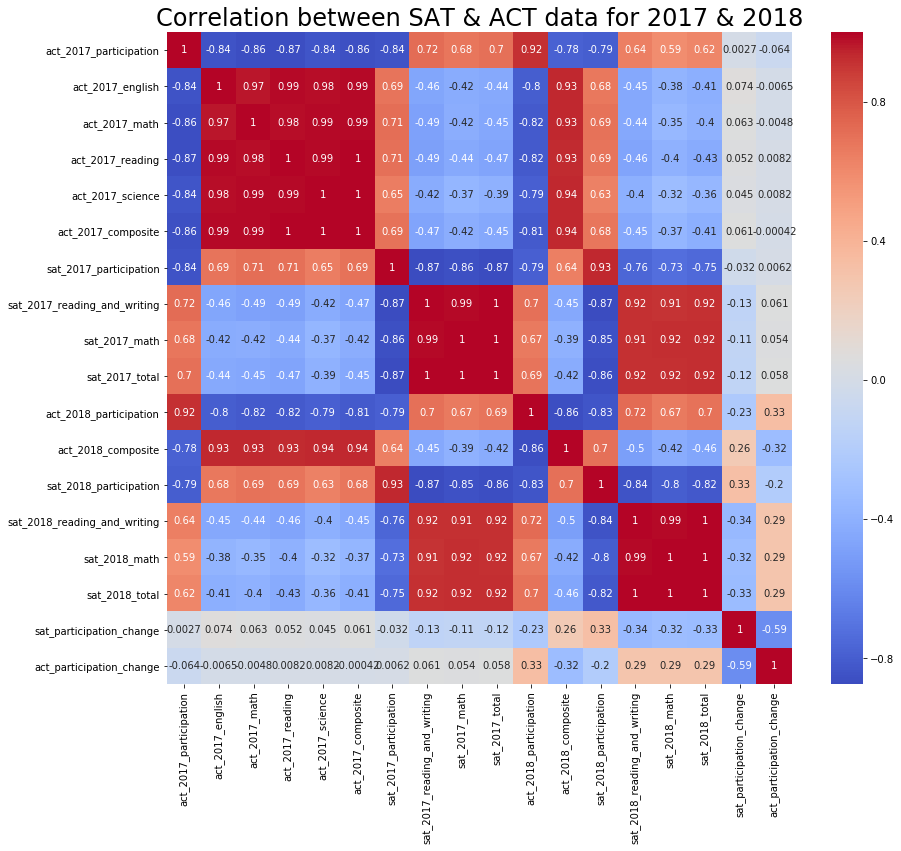

In [96]:
# set size of plot
plt.figure(figsize=(14, 12))

# add title to plot
plt.title("Correlation between SAT & ACT data for 2017 & 2018", fontsize = 24)
sns.heatmap(final.corr(), annot=True, cmap='coolwarm');

Interpretation:  
Scores in 2017 are positively correlated with scores in 2018 for both SAT and ACT.  
Participation in 2017 is positively correlated with participation in 2018 for both SAT and ACT.  
Participation is negatively correlated with scores for both.  
SAT participation is negatively correlated with SAT participation.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [97]:
# def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].hist(dataframe[column]) # feel free to add more settings
#         # Set titles, labels, etc here for each subplot

In [98]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

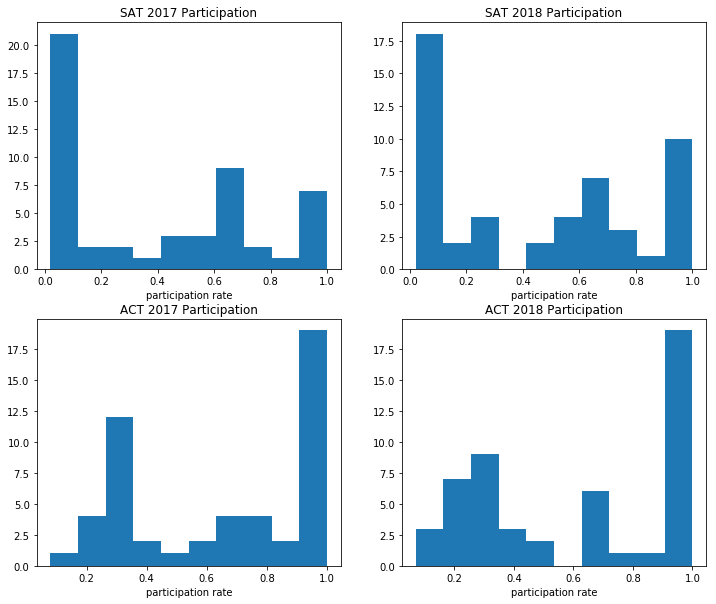

In [99]:
subplot_histograms(final, 
                   list_of_columns=['sat_2017_participation', 'sat_2018_participation', 
                           'act_2017_participation', 'act_2018_participation'], 
                   list_of_titles=['SAT 2017 Participation', 'SAT 2018 Participation', 'ACT 2017 Participation', 
                                  'ACT 2018 Participation'], 
                   list_of_xlabels=['participation rate', 'participation rate', 'participation rate', 'participation rate']
#                    list_of_ylabels=
                   )

Interpretation:  
Participation distributions remain similar between 2017 and 2018 for each test. 
SAT has more states with a participation rate at the lowest end, and ACT has more states with a participation rate at the highest end.


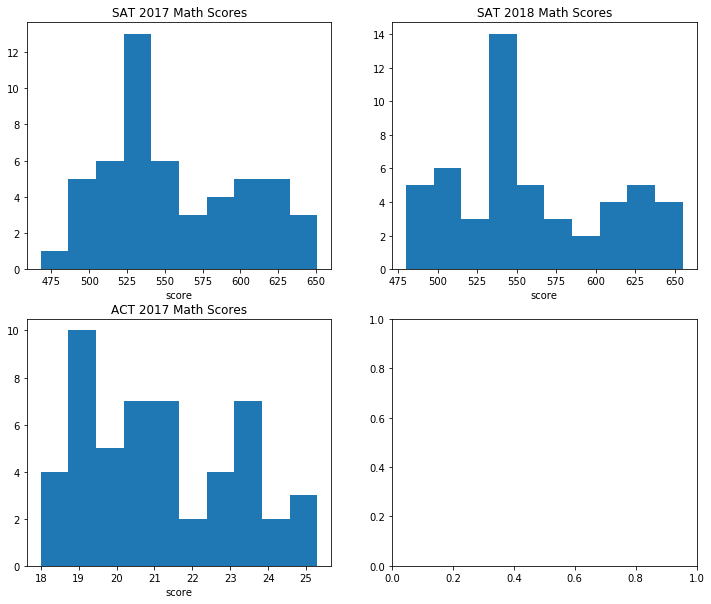

In [100]:
subplot_histograms(final, 
                   list_of_columns=['sat_2017_math', 'sat_2018_math', 'act_2017_math'], 
                   list_of_titles=['SAT 2017 Math Scores', 'SAT 2018 Math Scores', 'ACT 2017 Math Scores'], 
                   list_of_xlabels=['score', 'score', 'score', 'score']
                  )

Interpretation:  
For SAT, more states have a math score between 525 - 550.  
For ACT, more states have a math score between 19 - 19.5, but the scores are more evenly distributed overall than the SAT math scores.



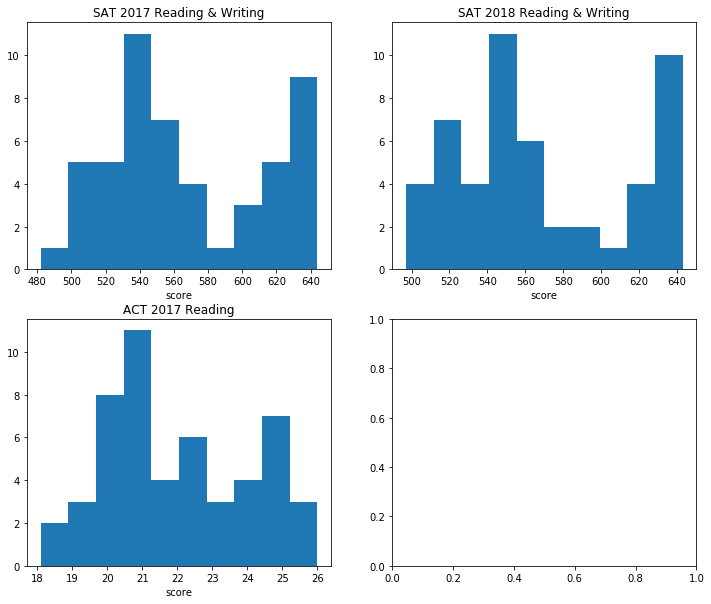

In [101]:
subplot_histograms(final, 
                   list_of_columns=['sat_2017_reading_and_writing', 'sat_2018_reading_and_writing', 
                           'act_2017_reading'], 
                   list_of_titles=['SAT 2017 Reading & Writing', 'SAT 2018 Reading & Writing', 'ACT 2017 Reading'], 
                   list_of_xlabels=['score', 'score', 'score']
                   )

Interpretation:  
Even though the scales (score) are different, the SAT and ACT have similar distributions for reading and writing scores.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [102]:
# didn't finish writing function for subplotting scatter plots

# def subplot_scatter(x_value, y_value, list_of_titles, list_of_xlabels):
#     nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
#     fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(6,6)) # You'll want to specify your figsize
#     ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
#     for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
#         ax[i].scatter(x_value, y_value) # feel free to add more settings
#         ax[i].set_title(list_of_titles[i]) # Set titles for each subplot
#         ax[i].set_xlabel(list_of_xlabels[i]) # Set xlabels for each subplot

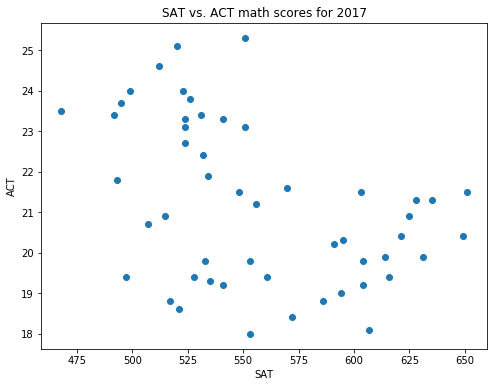

In [103]:
# scatter plot: SAT vs. ACT math scores for 2017

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.sat_2017_math, final.act_2017_math)
ax.set_title('SAT vs. ACT math scores for 2017')
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

Interpretation:  
There are no states that have high math scores for both SAT and ACT in 2017. There are some outliers: 1 state has a high ACT score but the lowest SAT score, and some states that have middle to high SAT scores but low ACT scores.

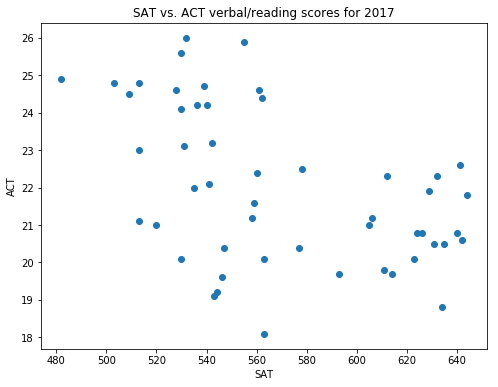

In [104]:
# scatter plot: SAT vs. ACT verbal/reading scores for 2017

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.sat_2017_reading_and_writing, final.act_2017_reading)
ax.set_title('SAT vs. ACT verbal/reading scores for 2017');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

Interpretation:  
There are no states that have high verbal/reading scores for both SAT and ACT in 2017. There are some outliers: 1 state has a high ACT score but the lowest SAT score, and some states that have middle to high SAT scores but low ACT scores.

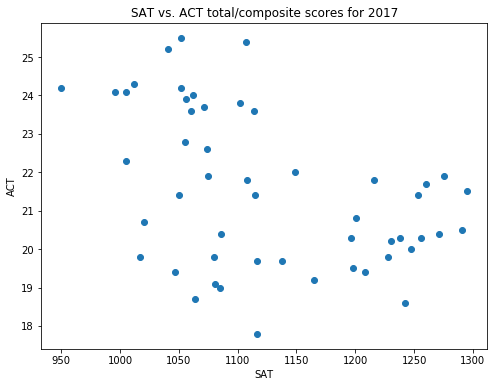

In [105]:
# scatter plot: SAT vs. ACT total/composite scores for 2017

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.sat_2017_total, final.act_2017_composite)
ax.set_title('SAT vs. ACT total/composite scores for 2017');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

Interpretation:  
There are no states that have high total/composite scores for both SAT and ACT in 2017. There are some outliers: 1 state has a high ACT score but the lowest SAT score, and some states that have middle to high SAT scores but low ACT scores.

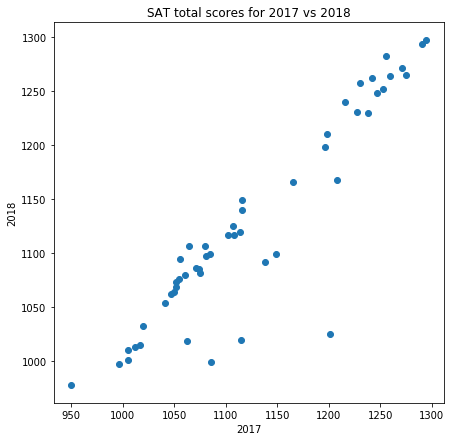

In [106]:
# scatter plot: Total scores for SAT 2017 vs. 2018

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.sat_2017_total, final.sat_2018_total)
ax.set_title('SAT total scores for 2017 vs 2018');
ax.set_xlabel('2017')
ax.set_ylabel('2018');

Interpretation:  
Most states' SAT scores remained approximately constant between 2017 and 2018, however there are some states where scores decreased from 2017 to 2018.

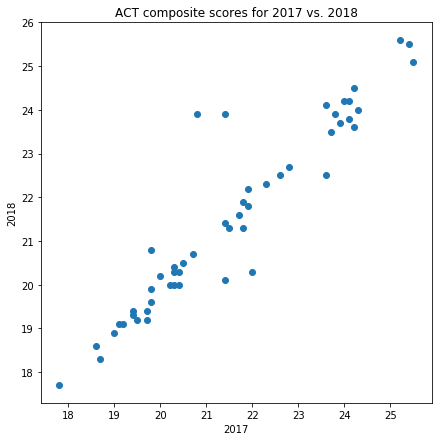

In [107]:
# scatter plot: Composite scores for ACT 2017 vs. 2018

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.act_2017_composite, final.act_2018_composite)
ax.set_title('ACT composite scores for 2017 vs. 2018');
ax.set_xlabel('2017')
ax.set_ylabel('2018');

Interpretation:  
Most states' SAT scores remained approximately constant between 2017 and 2018, however there were 2 states where scores increased from 2017 to 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

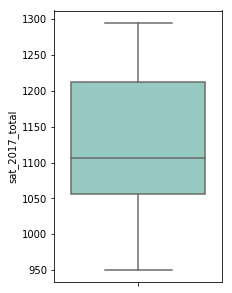

In [108]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="sat_2017_total", data=final, palette="Set3")

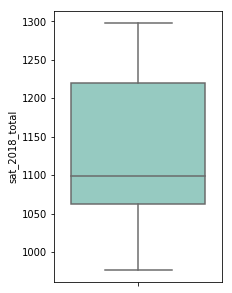

In [109]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="sat_2018_total", data=final, palette="Set3")

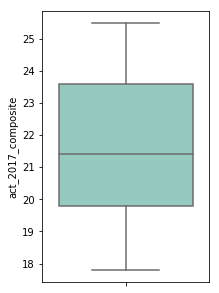

In [110]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="act_2017_composite", data=final, palette="Set3")

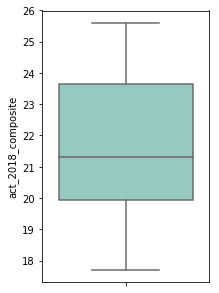

In [111]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="act_2018_composite", data=final, palette="Set3")

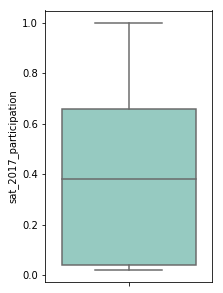

In [112]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="sat_2017_participation", data=final, palette="Set3")

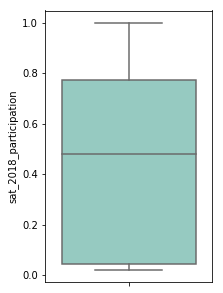

In [113]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="sat_2018_participation", data=final, palette="Set3")

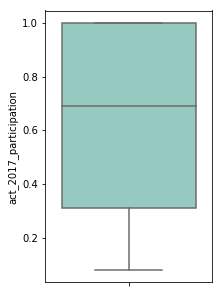

In [114]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="act_2017_participation", data=final, palette="Set3")

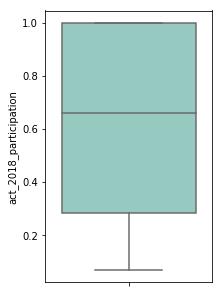

In [115]:
fig, ax = plt.subplots(figsize=(3,5))
ax = sns.boxplot(y="act_2018_participation", data=final, palette="Set3")

Interpretation: Box plots show ACT participation is skewed toward the higher end and SAT participation is skewed toward the lower end. Scores are more centrally distributed for both.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

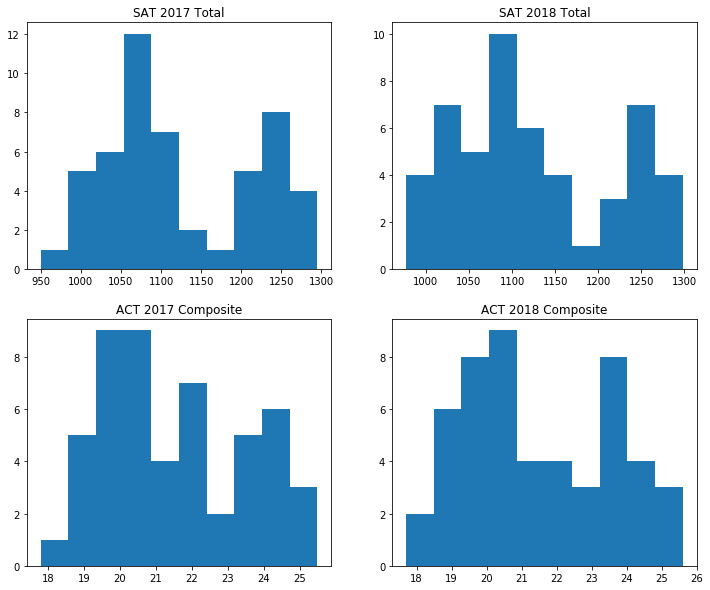

In [116]:
# histograms for SAT total and ACT composite scores for 2017 and 2018

subplot_histograms(final, 
                   list_of_columns=['sat_2017_total', 'sat_2018_total', 
                           'act_2017_composite', 'act_2018_composite'], 
                   list_of_titles=['SAT 2017 Total', 'SAT 2018 Total', 'ACT 2017 Composite', 
                                  'ACT 2018 Composite'], 
                   list_of_xlabels=['', '', '', '']
#                    list_of_ylabels=
                   )

Interpretation:  
Both the SAT and ACT total/composite scores have distributions that are generally lower for the middle-range scores.

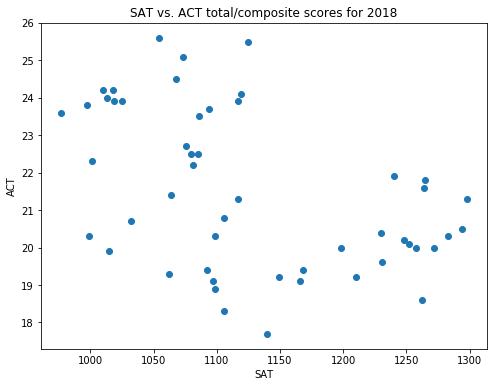

In [117]:
# scatter plot: SAT vs. ACT total/composite scores for 2018

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(final.sat_2018_total, final.act_2018_composite)
ax.set_title('SAT vs. ACT total/composite scores for 2018');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

Interpretation:  
There are no states that have high total/composite scores for both SAT and ACT in 2018. There are some outliers: 1 state has a high ACT score but the lowest SAT score, and some states that have middle to high SAT scores but low ACT scores.

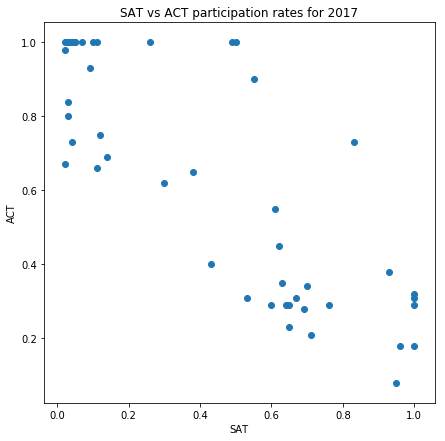

In [118]:
# scatter plot: Participation rates for SAT vs ACT 2017

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.sat_2017_participation, final.act_2017_participation)
ax.set_title('SAT vs ACT participation rates for 2017');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

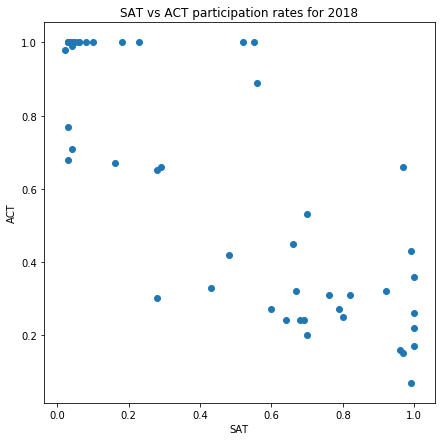

In [119]:
# scatter plot: Participation rates for SAT vs ACT 2018

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(final.sat_2018_participation, final.act_2018_participation)
ax.set_title('SAT vs ACT participation rates for 2018');
ax.set_xlabel('SAT')
ax.set_ylabel('ACT');

Interpretation: Most states have either high participation in SAT and low participation in ACT or vice versa. Only 1 state has participation rate > 60% for both.


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [120]:
# didn't have time

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### Summarizing Distributions

act_2017_participation:
- mean: 0.652549
- median: 0.690000
- std: 0.321408
- skew: left
- distribution is bimodal

act_2017_composite:
- mean: 21.519608
- median: 21.400000
- std: 2.020695
- skew: right

sat_2017_participation:
- mean: 0.398039
- median: 0.380000
- std: 0.352766
- skew: right

sat_2017_total:
- mean: 1126.098039
- median: 1107.000000
- std: 92.494812
- skew: right

act_2018_participation:
- mean: 0.617255
- median: 0.660000
- std: 0.340371
- skew: left

act_2018_composite:
- mean: 21.496078
- median: 21.300000
- std: 2.111583
- skew: right

sat_2018_participation:
- mean: 0.452353
- median: 0.480000
- std: 0.373007
- skew: left

sat_2018_total:
- mean: 1126.156863
- median: 1099.000000
- std: 94.444136
- skew: right


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:  
The SAT & ACT data is not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:  
Per the histograms in the previous section (Data Visualization), none of the following data are normally distributed for either 2017 or 2018:  
- Math scores
- Reading scores
- Participation rates  

This means that estimates based on samples of some of the states cannot be generalized to all the states.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:  
If the full population is all US high school juniors (every student eligible to take the ACT or SAT), we have taken 51 samples and found the mean participation rate for each. However, the samples are not random, since they were chosen by the state in which the students are attending school. Also the number of students in each state varies significantly, so the states shouldn't be given equal weight if we are trying to determine the overall US participation rate. The participation rates for the states can't be generalized to the overall US population. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:  
We might want to compare SAT and ACT math scores from the same year to try to determine which math test is more difficult, or possibly which math test students were more prepared for. However, the samples of students taking the SAT or ACT are not equivalent. Some states require one test or the other, so in these states there are probably more students who are less prepared for the test but take it anyway. We could expect those states to have lower scores than a state where only the top students took the test (this is supported by the inverse relationship between participation rate and test score).

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [121]:
# I have no hypotheses which would be appropriate to test this way.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:  

Based on the observations, I have identified these states as especially interesting:  

- Illinois (largest increase in SAT participation from 2017 to 2018, +0.90 from 9% to 99%)
- District of Columbia (largest decrease in SAT participation from 2017 to 2018, -0.09 from 100% to 92%)
- Michigan, Connecticut and Delaware were the only states with 100% SAT participation in both 2017 and 2018

Per https://blog.prepscholar.com/which-states-require-the-sat:

All of the above states are among the 20 states (and DC) which are contracted with the College Board to administer the SAT for free as part of the SAT School Day program.

Illinois began requiring all juniors to take the SAT beginning with the 2016-17 school year, there seems to have been a delay of a year before this increased participation.

Below, I compared participation and scores between the states participating in SAT School Day and the non-participating states.

In [122]:
SAT_SD_states = ['Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 
                'Idaho', 'Illinois', 'Maine', 'Michigan', 'New Hampshire', 
                'Ohio', 'Oklahoma', 'Rhode Island', 'South Carolina', 'Tennesee', 
                'West Virginia']

In [123]:
# compare SAT_SD states participation rates and scores with other states

In [124]:
# mask for SAT_SD states
mask_SAT_SD = final['state'].isin(SAT_SD_states)

In [125]:
# summary statistics for SAT_SD states SAT participation rates for 2017 and 2018

final[mask_SAT_SD].loc[:, ['sat_2017_participation', 'sat_2018_participation']].describe()

,sat_2017_participation,sat_2018_participation
count,14.000000,14.000000
mean,0.612857,0.728571
std,0.415459,0.365405
min,0.070000,0.080000
25%,0.125000,0.347500
50%,0.820000,0.965000
75%,0.990000,0.997500
max,1.000000,1.000000


In [126]:
# summary statistics for non-participating states SAT participation rates for 2017 and 2018

final[-mask_SAT_SD].loc[:, ['sat_2017_participation', 'sat_2018_participation']].describe()

,sat_2017_participation,sat_2018_participation
count,37.000000,37.000000
mean,0.316757,0.347838
std,0.292869,0.322690
min,0.020000,0.020000
25%,0.030000,0.040000
50%,0.260000,0.230000
75%,0.620000,0.670000
max,0.830000,0.970000


In [127]:
# SAT_SD states with lowest SAT participation:

final[mask_SAT_SD].loc[:, ['state', 'sat_2017_participation', 'sat_2018_participation']].sort_values(by='sat_2018_participation').head()

,state,sat_2017_participation,sat_2018_participation
36,Oklahoma,0.07,0.08
35,Ohio,0.12,0.18
5,Colorado,0.11,0.28
48,West Virginia,0.14,0.28
40,South Carolina,0.50,0.55


In [128]:
# non-SAT_SD states with lowest SAT participation:

final.loc[:, ['state', 'sat_2017_participation', 'sat_2018_total']].sort_values(by='sat_2018_total').head()

,state,sat_2017_participation,sat_2018_total
8,District of Columbia,1.00,977
7,Delaware,1.00,997
48,West Virginia,0.14,999
12,Idaho,0.93,1001
22,Michigan,1.00,1010


In [129]:
# summary statistics for SAT_SD states SAT scores for 2017 and 2018

final[mask_SAT_SD].loc[:, ['sat_2017_total', 'sat_2018_total']].describe()

,sat_2017_total,sat_2018_total
count,14.000000,14.000000
mean,1056.071429,1032.357143
std,65.896731,39.794872
min,950.000000,977.000000
25%,1006.750000,1003.250000
50%,1049.500000,1018.500000
75%,1080.500000,1060.000000
max,1201.000000,1106.000000


In [130]:
# summary statistics for non-SAT_SD states SAT scores for 2017 and 2018

final[-mask_SAT_SD].loc[:, ['sat_2017_total', 'sat_2018_total']].describe()

,sat_2017_total,sat_2018_total
count,37.000000,37.000000
mean,1152.594595,1161.648649
std,87.668080,84.263547
min,1017.000000,1015.000000
25%,1075.000000,1092.000000
50%,1116.000000,1140.000000
75%,1238.000000,1248.000000
max,1295.000000,1298.000000


In [131]:
# SAT_SD states with lowest scores:

final[mask_SAT_SD].loc[:, ['state', 'sat_2017_total', 'sat_2018_total']].sort_values(by='sat_2018_total').head()

,state,sat_2017_total,sat_2018_total
8,District of Columbia,950,977
7,Delaware,996,997
48,West Virginia,1086,999
12,Idaho,1005,1001
22,Michigan,1005,1010


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Conclusions:  

#### SAT School Day
The SAT School Day program seems to be having a positive effect on participation. States participating in SAT School Day had an average SAT participation rate of approx. 72.9% vs 34.8% in other states in 2018. However, higher participation rates also correlate with lower average scores. SAT School Day schools had average score of 1032.4 vs 1161.6 in other states in 2018.

### Recommendations:  

#### Targets for Improvement
These states are targets for improvement. I recommend additional investment in the SAT School Day program for the states in the program that have the lowest SAT participation rate, and DC which saw the largest decrease from 2017 to 2018. I also recommend targeting the states with the lowest SAT participation rates to join SAT School Day, as they have the biggest potential for impact on participation. They don't already require the ACT, so they may also be more open to increasing SAT participation than the ACT-mandatory states.
- District of Columbia (largest decrease in SAT participation from 2017 to 2018, from 100% to 92%)
- states already in SAT School Day with lowest 2018 participation rates: Tennessee, Oklahoma; and lowest 2018 scores: DC (977 total), Delaware (997 total)
- states w/lowest 2018 SAT participation rates (not already requiring ACT): Oklahoma (8%), Ohio (18%) 

#### Top Performers
These states are success stories for SAT. Perhaps with additional data on the strategies these states used for participation and scores, we could develop additional recommendations.

- Illinois (largest increase in SAT participation, from 9% to 99%)

- Michigan, Connecticut and Delaware were the only states with 100% SAT participation in both 2017 and 2018

- top 2018 SAT scores: 
Minnesota: 1298
Wisconsin: 1294
North Dakota: 1283
